In [1]:
# Tests using Quantum Artificial Neural models implementation on quantum_neural_models.ipynb
# Author: Eduardo Barreto Brito/CIn UFPE

In [16]:
%run quantum_neural_models.ipynb

In [3]:
def run_circuit_and_get_amplitude(circuit):
    circuit = circuit.reverse_bits()
    backend = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend, shots=1000).result()
    statevector = result.get_statevector(circuit)
    return statevector

  q0    q1    ampl
----  ----  ------
   0     0       1
   0     1      -1
   1     0      -1
   1     1      -1


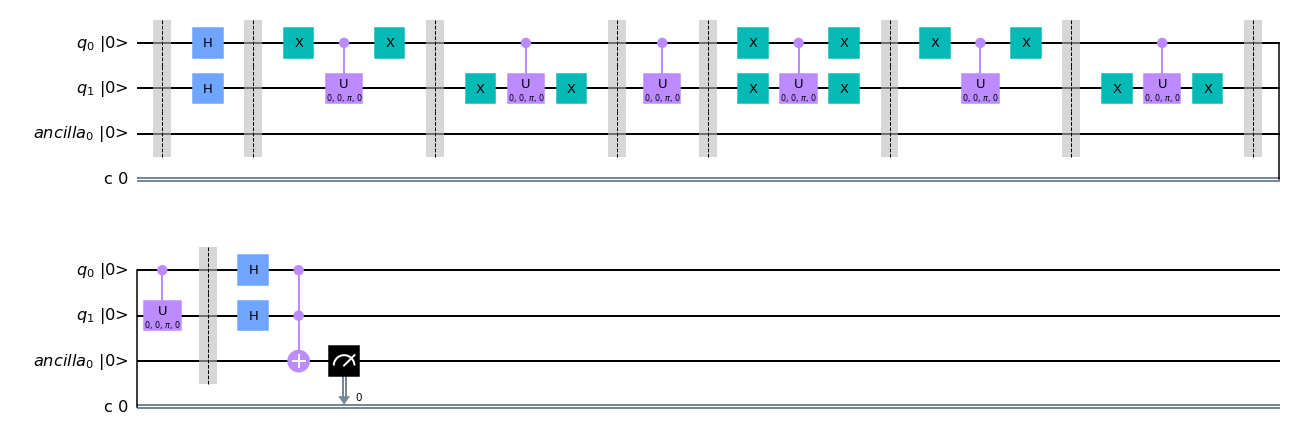

In [17]:
input = [1, -1, -1, -1]
weight = [-1, -1, -1, -1]

an = BruteForceQan(2)
an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)
an.append_circuit(weight)
an.append_hadamard_gates()

an.finish_circuit()
an._circuit.draw(output='mpl', initial_state=True)

In [13]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [ 0.5+5.79862601e-17j -0.5+3.38622498e-17j -0.5-8.96726857e-18j
 -0.5+8.28812414e-17j]


  q0    q1    ampl
----  ----  ------
   0     0     0.3
   0     1    -0.2
   1     0     0.6
   1     1    -0.9


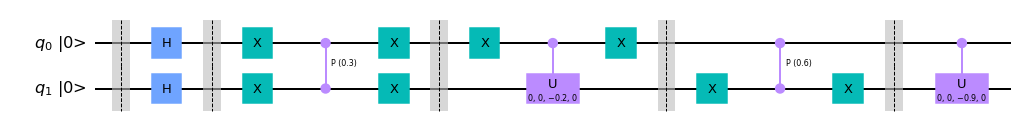

In [6]:
input = [0.3, -0.2, 0.6, -0.9]
an = PhaseShiftBruteForceQan(2)

an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)
#an.append_hadamard_gates()

#an.finish_circuit()
an._circuit.draw(output='mpl', initial_state=True)

In [7]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [0.47766824+0.1477601j  0.49003329-0.09933467j 0.41266781+0.28232124j
 0.31080498-0.39166345j]


  q0    q1    ampl
----  ----  ------
   0     0       1
   0     1      -1
   1     0       1
   1     1      -1


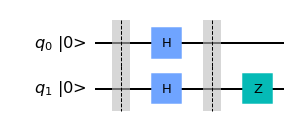

In [8]:
input = [1, -1, 1, -1]
an = HSGSQan(2)

an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)
#an.append_hadamard_gates()

#an.finish_circuit()
an._circuit.draw(output='mpl', initial_state=True)

In [9]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]


In [10]:
#simulator = Aer.get_backend('qasm_simulator')
#result = execute(an._circuit, backend = simulator).result()
#plot_histogram(result.get_counts(an._circuit))

In [11]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary.round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]
